In [8]:
%load_ext autoreload
%autoreload 2

import os,sys
parent_dir = os.path.abspath('..')
if parent_dir not in sys.path:
    sys.path.insert(0, parent_dir)
import util as yu
from util import *
import util_Nsgm as yu2

yu.setpath('analysis_noNsgm')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 2pt

In [2]:
path='/capstor/store/cscs/userlab/lp139/lyan/code/projectData/01_Nsgm/data/Nsgm_4src_16,18,20_cB211.072.64.h5'
# yu.print_hdf5_structure(path)

opabs=['g;0,0,0;G1g;a;l1;N_g;0,0,0;G1g;a;l1;N', 'g;0,0,0;G1g;a;l2;N_g;0,0,0;G1g;a;l2;N']
with h5py.File(path) as f:
    dic=yu.list2dic(yu.decodeList(f['diags/N/opabs'][:]))
    t=f['diags/N/data/p_p'][:]
    t=np.mean([t[:,:,dic[opab]] for opab in opabs],axis=0)
    t=np.real(t)
    c2pt=yu.jackknife(t)

In [3]:
ens='b'
meff=yu.jackmap(yu.c2pt2meff,c2pt)
tminss=[range(8,25+1),range(1,10+1),range(1,4+1)]
selection={'1st':20,'2st':7,'3st':3}
fitss_2pt=yu.doFits_meff_nst(meff,tminss,[0.4,0.5,2,0.8,1],label=f'meff')
fig,axd,result=yu.makePlot_2pt_SimoneStyle(meff,fitss_2pt,xunit=yu.ens2a[ens],yunit=yu.ens2aInv[ens]/1000,E0_ref=yu.m_avgpn/1000,ylims='std_N',selection=selection)
yu.finalizePlot('meff')

[pars_jk_meff1st,pars_jk_meff2st,pars_jk_meff3st]=[result['1st'],result['2st'],result['3st']]
yu.save_pkl_reg('pars_jk_meffnst',[pars_jk_meff1st,pars_jk_meff2st,pars_jk_meff3st])

In [8]:
fig,axd,result=yu.makePlot_2pt_SimoneStyle(meff,fitss_2pt,xunit=yu.ens2a[ens],yunit=yu.ens2aInv[ens]/1000,E0_ref=yu.m_avgpn/1000,ylims='std_N',selection=selection)
(ax1,ax2,ax3)=(axd[key] for key in ['f1','f2','f3'])
xunit=yu.ens2a[ens]; yunit=yu.ens2aInv[ens]/1000

n=2
lbd0=np.mean(pars_jk_meff2st[:,0]+pars_jk_meff2st[:,1])*n
lbd=np.sqrt(np.exp(-lbd0)+np.exp(lbd0)-2)
def func(c):
    return -(np.roll(c,n) + np.roll(c,-n) - 2*c) + lbd**2 * c
t_c2pt=yu.jackmap(func,c2pt)
t_meff=yu.jackmap(yu.c2pt2meff,t_c2pt)
mean,err=yu.jackme(t_meff)
tmin=1; tmax=20
plt_x=np.arange(tmin,tmax)*xunit; plt_y=mean[tmin:tmax]*yunit; plt_yerr=err[tmin:tmax]*yunit
ax1.errorbar(plt_x,plt_y,plt_yerr,color='orange')

yu.finalizePlot('meff_laplace')

In [9]:
fig,axd,result=yu.makePlot_2pt_SimoneStyle(meff,fitss_2pt,xunit=yu.ens2a[ens],yunit=yu.ens2aInv[ens]/1000,E0_ref=yu.m_avgpn/1000,ylims='std_N',selection=selection)
(ax1,ax2,ax3)=(axd[key] for key in ['f1','f2','f3'])
xunit=yu.ens2a[ens]; yunit=yu.ens2aInv[ens]/1000

n=2
lbd0=np.mean(pars_jk_meff2st[:,0]+pars_jk_meff2st[:,1])*n
lbd=-(np.exp(-lbd0)-1)
def func(c):
    return (np.roll(c,-n) - np.roll(c,0)) + lbd*c
t_c2pt=yu.jackmap(func,c2pt)
t_meff=yu.jackmap(yu.c2pt2meff,t_c2pt)
mean,err=yu.jackme(t_meff)
tmin=1; tmax=20
plt_x=np.arange(tmin,tmax)*xunit; plt_y=mean[tmin:tmax]*yunit; plt_yerr=err[tmin:tmax]*yunit
ax1.errorbar(plt_x,plt_y,plt_yerr,color='orange')

yu.finalizePlot('meff_1Dfilter')

# 3pt

In [4]:
ens='b'
mul=yu.ens2amul[ens]

tfs=[8,10,12,14,16,18,20]

tf2c3pt_conn={}
tf2c3pt_disc={}
opabs=['g;0,0,0;G1g;a;l1;N_g;0,0,0;G1g;a;l1;N', 'g;0,0,0;G1g;a;l2;N_g;0,0,0;G1g;a;l2;N']
path='/capstor/store/cscs/userlab/lp139/lyan/code/projectData/01_Nsgm/data/Nsgm_4src_16,18,20_cB211.072.64.h5'
with h5py.File(path) as f:
    cfgs=yu.decodeList(f['cfgs'])
    for tf in tfs:
        iins=yu.decodeList(f['diags/NJN/inserts']).index('id')
        dic=yu.list2dic(yu.decodeList(f['diags/NJN/opabs'][:]))
        t=f[f'diags/NJN/data/p_j+_p_deltat_{tf}'][:,:,:,iins]
        t=np.mean([t[:,:,dic[opab]] for opab in opabs],axis=0)
        t=np.real(t*mul)
        t=yu.jackknife(t)
        tf2c3pt_conn[tf]=t

        iins=yu.decodeList(f['diags/N-j/inserts']).index('id')
        dic=yu.list2dic(yu.decodeList(f['diags/N-j/opabs'][:]))
        t=f[f'diags/N-j/data/p_j+_p_deltat_{tf}'][:,:,:,iins]
        t=np.mean([t[:,:,dic[opab]] for opab in opabs],axis=0)
        t=np.real(t*mul)
        t=yu.jackknife(t)
        
        tvev=np.real(f['VEV/j/data/j+'][:,iins]*mul)
        tvev=yu.jackknife(tvev)
        
        tf2c3pt_disc[tf]=t-c2pt[:,tf:tf+1]*tvev[:,None]

cfg2old=lambda cfg: cfg[1:]+'_r'+{'a':'0','b':'1','c':'2','d':'3'}[cfg[0]]
cfg2new=lambda cfg: {'0':'a','1':'b','2':'c','3':'d'}[cfg[-1]] + cfg[:4]
path='/capstor/store/cscs/userlab/lp139/lyan/code/projectData_old/01_Nsgm/cB211.072.64_base/data_from_others/thrp-conn.h5'
with h5py.File(path) as f:
    cfgs_old=[cfg2old(cfg) for cfg in cfgs]

    tf2c3pt_conn_more={tf:np.real(yu.jackknife([f[f'gS/up/dt{tf}/{cfg}'][:] + f[f'gS/dn/dt{tf}/{cfg}'][:] for cfg in cfgs_old])*mul) for tf in tfs}
    tf2c2pt={tf:np.real(yu.jackknife([f[f'dt{tf}_twop/{cfg}'][()] for cfg in cfgs_old])) for tf in tfs}
    
tf2c3pt={}
for tf in tfs:
    tf2c3pt[tf]=tf2c3pt_conn_more[tf]+tf2c3pt_disc[tf]
    if True:
        tf2c3pt[tf]=(tf2c3pt[tf]+tf2c3pt[tf][:,::-1])/2

In [72]:
tf2ratio={}
for tf in tfs:
    tf2ratio[tf]=tf2c3pt[tf]/c2pt[:,tf:tf+1]



tfmins_2st=[8,10,12,14,16,18]
tcmins_2st=[1,2,3,4,5,6,7,8]
fits_2st=yu.doFits_3pt('2st2step_SYMshare',tf2ratio,tfmins_2st,tcmins_2st,pars_jk_meff2st=pars_jk_meff2st,symmetrizeQ=True,label=f'2st')
fit_2st_MA=yu.doMA_3pt(fits_2st,tfmin_min=12,tcmin_min=4)

n=2
lbd0=np.mean(pars_jk_meff2st[:,1])*n*0.6
print(lbd0*yu.ens2aInv[ens]/2)
lbd=np.sqrt(np.exp(-lbd0)+np.exp(lbd0)-2)
tf2ratio2={}
for tf in tfs:
    c3=tf2c3pt[tf]
    c3=-(np.roll(c3,-n,axis=-1)+np.roll(c3,n,axis=-1)-2*c3) + lbd**2*c3
    c2=(lbd**2)*c2pt[:,tf]
    tf2ratio2[tf]=c3/c2[:,None]
    
tfmins_1st=[8,10,12,14,16,18,20]
tcmins_1st=[3,4,5,6,7,8]
    
fits_band_2=yu.doFits_3pt_band(tf2ratio2,tcmins_1st,corrQ=False,label=f'band_2',overwrite=True)
# fit_band_WA_2=yu.doWA_band(fits_band_2,tf_min=gett(0.8),tf_max=gett(1.3),tcmin=gett(0.2),corrQ=False)
fits_const_2=yu.doFits_3pt('const',tf2ratio2,tfmins_1st,tcmins_1st,symmetrizeQ=True,label=f'const_2',overwrite=True)
fit_const_MA_2=yu.doMA_3pt(fits_const_2)

dic={
    'base:[tf2ratio,fits_band,fits_const,fits_sum,fits_2st]':[tf2ratio,None,None,None,fits_2st],
    'WAMA:[fit_band_WA,fit_const_MA,fit_sum_MA,fit_2st_MA]':[None,None,None,None],
    'rainbow:[tfmin,tfmax,tcmin,dt]':[None,None,1,None],
    'xyunit':[yu.ens2a[ens],yu.ens2aInv[ens]],
    # 'fit_2st_rainbow_midpoint:[fittype,pars_jk_meff2st]':['2st2step_SYMshare',pars_jk_meff2st],
    'mfc:[global]':['None'],
}

dic2={
    'base:[tf2ratio,fits_band,fits_const,fits_sum,fits_2st]':[tf2ratio2,fits_band_2,fits_const_2,None,None],
    'WAMA:[fit_band_WA,fit_const_MA,fit_sum_MA,fit_2st_MA]':[None,None,None,None],
    'rainbow:[tfmin,tfmax,tcmin,dt]':[None,None,n+1,None],
    'xyunit':[yu.ens2a[ens],yu.ens2aInv[ens]],
    'mfc:[global]':['white'],
} 

358.0692083194


In [73]:
fig,axs=yu.makePlot_3pt(dic,shows=['rainbow','midpoint','fit_2st','fit_band'],colHeaders=None)
axs[0,0].set_ylim([5,75])
yu.addColHeader(axs,['ratio','mid point','2st fit (const fit)',r'fit to each $t_s$'])
fig,axs=yu.makePlot_3pt(dic2,shows=['rainbow','midpoint','fit_const','fit_band'],figAxs=(fig,axs),colHeaders=None)
yu.finalizePlot('ratio_tc_laplace')

In [80]:
def run(lbd):
    n=2
    lbd0=np.mean(pars_jk_meff2st[:,1])*n*0.6*lbd
    lbd=np.sqrt(np.exp(-lbd0)+np.exp(lbd0)-2)
    tf2ratio={}
    for tf in tfs:
        c3=tf2c3pt[tf]
        c3=-(np.roll(c3,-n,axis=-1)+np.roll(c3,n,axis=-1)-2*c3) + lbd**2*c3
        c2=(lbd**2)*c2pt[:,tf]
        tf2ratio[tf]=c3/c2[:,None]
    
    tfmins_1st=[12]
    tcmins_1st=[3]
    fits_const=yu.doFits_3pt('const',tf2ratio,tfmins_1st,tcmins_1st,symmetrizeQ=True)
    [(tfmin,tcmin),pars_jk,chi2_jk,Ndof]=fits_const[0]
    return pars_jk,chi2_jk,Ndof

lbds=np.arange(0.5,2.0,0.01)
fits=[run(lbd) for lbd in lbds]
pars=np.concatenate([pars_jk for pars_jk,chi2_jk,Ndof in fits],axis=1)
chi2s=[np.mean(chi2_jk) for pars_jk,chi2_jk,Ndof in fits]
pvals=[yu.chi2Ndof2pval(np.mean(chi2_jk),Ndof) for pars_jk,chi2_jk,Ndof in fits]

mean,err=yu.jackme(pars)

fig,axs=yu.getFigAxs(1,1)
ax=axs[0,0]
ax.set_ylim([5,75])
ax2=ax.twinx()
yunit=yu.ens2aInv[ens]

color='b'
x=lbds; ymin=(mean-err)*yunit; ymax=(mean+err)*yunit
ax.plot(x,mean*yunit,color=color,linestyle='--',marker='')
ax.fill_between(x, ymin, ymax, color=color, alpha=0.1)

ax2.plot(x,pvals,color='r',linestyle='--',marker='')

threshold=0.1
yu.addRefLine(ax2,threshold)
inds=[i for i,p in enumerate(pvals) if p>threshold]
t=lbds[inds]
ax.axvspan(min(t),max(t),color='grey',alpha=0.2)

sgm_min=min((mean-err)[inds]); sgm_max=max((mean+err)[inds])
ax.fill_between(lbds[inds],sgm_min*yunit,sgm_max*yunit,color='cyan',alpha=0.2,label=f'{sgm_min*yunit:.1f} - {sgm_max*yunit:.1f}')
ax.legend()

yu.finalizePlot('pval')

# early test

In [14]:
tf2ratio={}
for tf in tfs:
    tf2ratio[tf]=tf2c3pt[tf]/c2pt[:,tf:tf+1]
    
n=2
lbd0=np.mean(pars_jk_meff2st[:,0]+pars_jk_meff2st[:,1])*n
lbd=np.sqrt(np.exp(-lbd0)+np.exp(lbd0)-2)
tf2ratio2={}
for tf in tfs[n//2:-n//2]:
    c3=-(tf2c3pt[tf+n][:,n:-n]+tf2c3pt[tf-n] -2*tf2c3pt[tf][:,n//2:-n//2] ) + lbd**2*tf2c3pt[tf][:,n//2:-n//2]
    c2=-(c2pt[:,tf+n]+c2pt[:,tf-n]-2*c2pt[:,tf]) + lbd**2*c2pt[:,tf]
    tf2ratio2[tf-n]=c3/c2[:,None]

fig,axs=yu.makePlot_3pt_rainbow_compare(tf2ratio,tf2ratio2,xunit=yu.ens2a[ens],yunit=yu.ens2aInv[ens])
yu.finalizePlot('ratio_laplace')

In [15]:
tf2ratio={}
for tf in tfs:
    tf2ratio[tf]=tf2c3pt[tf]/c2pt[:,tf:tf+1]
    
n=2
lbd0=np.mean(pars_jk_meff2st[:,0]+pars_jk_meff2st[:,1])*n
lbd=-(np.exp(-lbd0)-1)
tf2ratio2={}
for tf in tfs[:-n//2]:
    c3=tf2c3pt[tf+n][:,n//2:-n//2]-tf2c3pt[tf] + lbd*tf2c3pt[tf]
    c2=c2pt[:,tf+n]-c2pt[:,tf] + lbd*c2pt[:,tf]
    tf2ratio2[tf]=c3/c2[:,None]

fig,axs=yu.makePlot_3pt_rainbow_compare(tf2ratio,tf2ratio2,xunit=yu.ens2a[ens],yunit=yu.ens2aInv[ens])

yu.finalizePlot('ratio_1Dfilter')

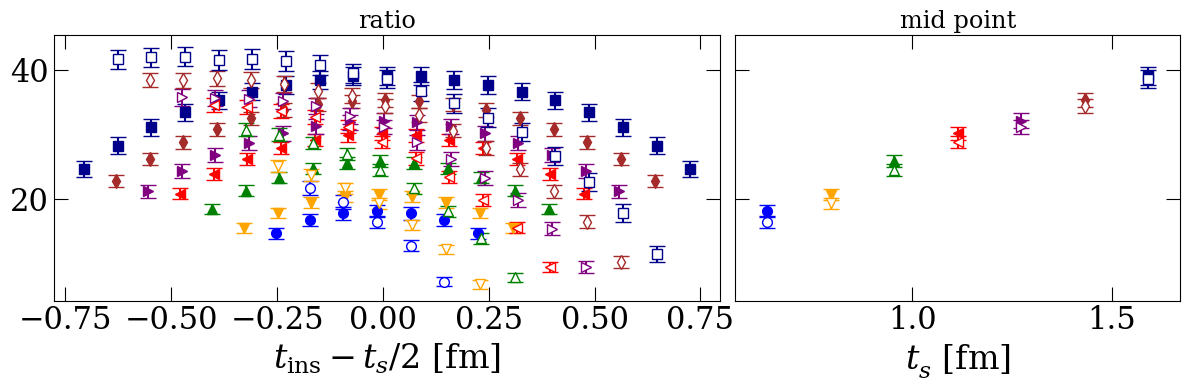

In [33]:
tf2ratio={}
for tf in tfs:
    tf2ratio[tf]=tf2c3pt[tf]/c2pt[:,tf:tf+1]
    
n=1
lbd0=np.mean(pars_jk_meff2st[:,1])*n
lbd=-(np.exp(-lbd0)-1)
tf2ratio2={}
for tf in tfs:
    c3=tf2c3pt[tf]
    c3=(np.roll(c3,-n,axis=-1)-c3) + lbd*c3
    c2=lbd*c2pt[:,tf]
    tf2ratio2[tf]=c3/c2[:,None]

fig,axs=yu.makePlot_3pt_rainbow_compare(tf2ratio,tf2ratio2,xunit=yu.ens2a[ens],yunit=yu.ens2aInv[ens],tcmin2=2)

yu.finalizePlot('ratio_tc_1Dfilter',closeQ=False)

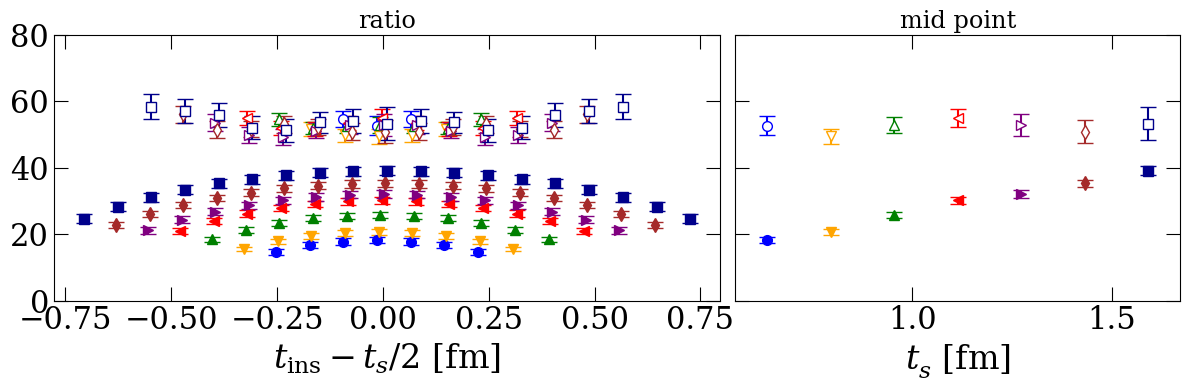

In [58]:
tf2ratio={}
for tf in tfs:
    tf2ratio[tf]=tf2c3pt[tf]/c2pt[:,tf:tf+1]
    tf2ratio[tf]=(tf2ratio[tf]+tf2ratio[tf][:,::-1])/2
    
n=2
lbd0=np.mean(pars_jk_meff2st[:,1])*n*0.6
# print(lbd0*yu.ens2aInv[ens])
lbd=np.sqrt(np.exp(-lbd0)+np.exp(lbd0)-2)
tf2ratio2={}
for tf in tfs:
    c3=tf2c3pt[tf]
    c3=-(np.roll(c3,-n,axis=-1)+np.roll(c3,n,axis=-1)-2*c3) + lbd**2*c3
    c2=(lbd**2)*c2pt[:,tf]
    tf2ratio2[tf]=c3/c2[:,None]

fig,axs=yu.makePlot_3pt_rainbow_compare(tf2ratio,tf2ratio2,tcmin2=3,xunit=yu.ens2a[ens],yunit=yu.ens2aInv[ens])
axs[0,0].set_ylim([0,80])

yu.finalizePlot('ratio_tc_laplace',closeQ=False)